In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['target'] = data['target']

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
species=[]
for i in range(len(df['target'])):
    if df['target'][i]==0:
        species.append('setosa')
    elif df['target'][i]==1:
        species.append('versicolor')
    else:
        species.append('verginica')
df['species']=species

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,verginica
146,6.3,2.5,5.0,1.9,2,verginica
147,6.5,3.0,5.2,2.0,2,verginica
148,6.2,3.4,5.4,2.3,2,verginica


In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,verginica
146,6.3,2.5,5.0,1.9,2,verginica
147,6.5,3.0,5.2,2.0,2,verginica
148,6.2,3.4,5.4,2.3,2,verginica


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
x=df.iloc[:,:-1].values
y=df.iloc[:,4].values

In [16]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [17]:
y[:5]

array([0, 0, 0, 0, 0])

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
scaler= StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [20]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
x_train[:5]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282, -1.22226591],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275, -1.22226591],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757,  0.01027114],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282, -1.22226591],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282, -1.22226591]])

In [22]:
accuracy_rate = []
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score =cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    accuracy_rate.append(score.mean())
print("final accuracy",accuracy_rate)

final accuracy [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 1.0, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9833333333333332, 0.9916666666666666, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9749999999999999]


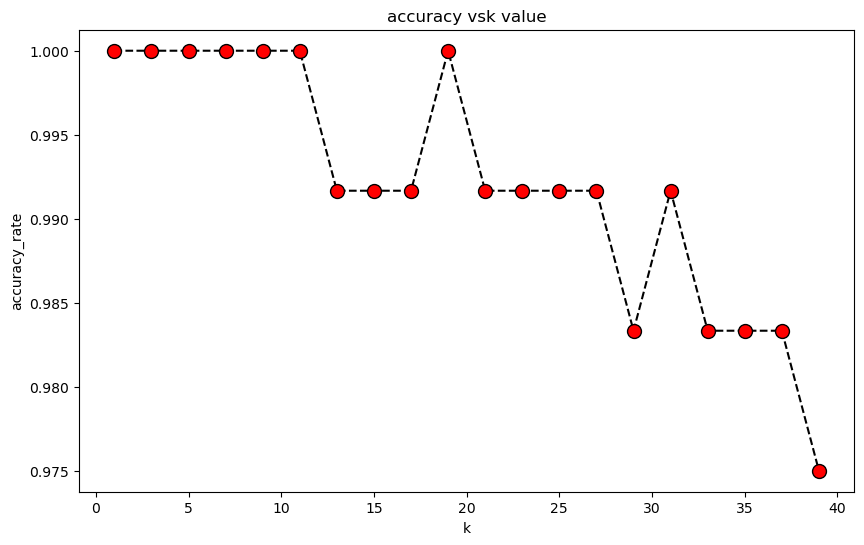

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),accuracy_rate,color='black',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title("accuracy vsk value")
plt.xlabel("k")
plt.ylabel("accuracy_rate")
plt.show()

In [24]:
error_rate=[1-x for x in accuracy_rate]

In [25]:
error_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008333333333333415,
 0.008333333333333415,
 0.008333333333333415,
 0.0,
 0.008333333333333415,
 0.008333333333333415,
 0.008333333333333415,
 0.008333333333333415,
 0.01666666666666683,
 0.008333333333333415,
 0.01666666666666683,
 0.01666666666666683,
 0.01666666666666683,
 0.025000000000000133]

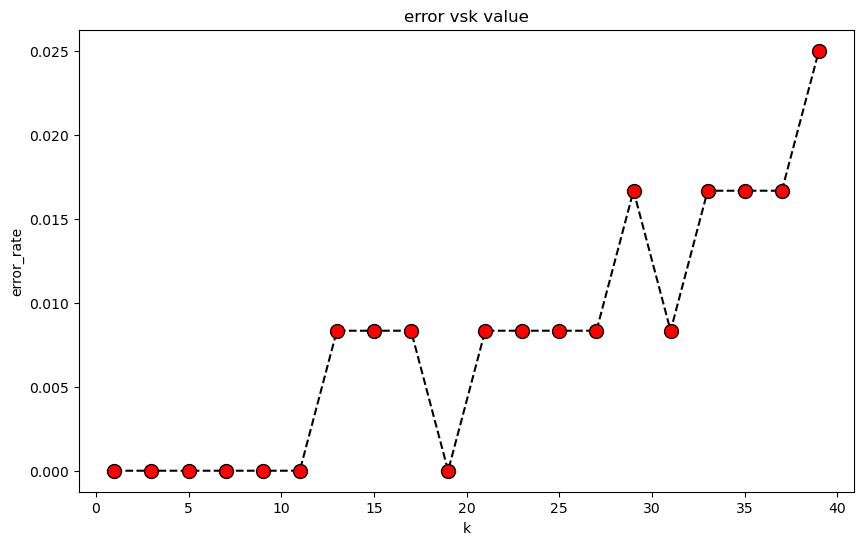

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),error_rate,color='black',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title("error vsk value")
plt.xlabel("k")
plt.ylabel("error_rate")
plt.show()

In [27]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [28]:
y_pred = model.predict(x_test)

In [29]:
y_pred 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [30]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

